In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize


1) Scipy:

We have the min and max temperatures in a city In India for each months of the year. 

We would like to find a function to describe this and show it graphically, the dataset given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

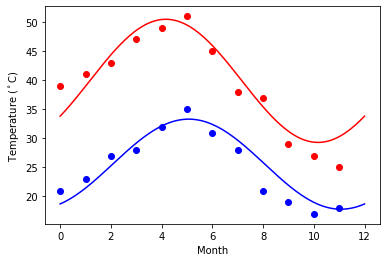

In [3]:
# 1)

Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = np.arange(12)


def yearly_temps(times, avg, ampl, time_offset):
    return avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max())


res_max, cov_max = optimize.curve_fit(yearly_temps, months, Max)
res_min, cov_min = optimize.curve_fit(yearly_temps, months, Min)
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel("Month")
plt.ylabel("Temperature ($^\circ$C)")
plt.show()



2) Matplotlib:

This assignment is for visualization using matplotlib:
data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)
Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


Columns Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

 1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, dtype: object

counts {'male': 843, 'female': 466}

total : 1309


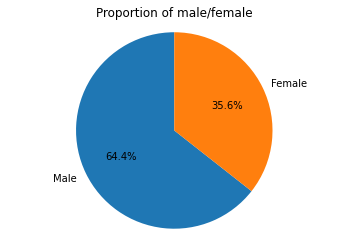

In [5]:
# 2.1) 


titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
print("\nColumns", titanic.columns)
print("\n", titanic["sex"].tail())
counts = titanic["sex"].value_counts().to_dict()
print("\ncounts", counts)
print("\ntotal :", titanic["sex"].value_counts().sum())
labels = "Male", "Female"
sizes = [counts["male"], counts["female"]]
fig1, ax1 = plt.subplots()
plt.title("Proportion of male/female")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()




new titanic -
       sex      age      fare
0  female  29.0000  211.3375
1    male   0.9167  151.5500
2  female   2.0000  151.5500
3    male  30.0000  151.5500
4  female  25.0000  151.5500


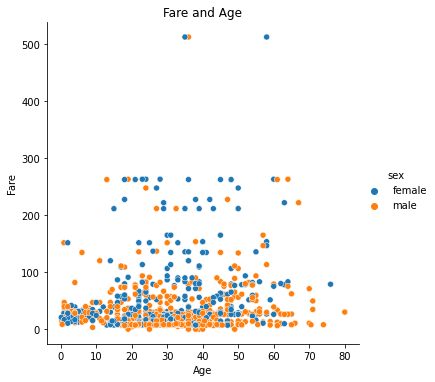

In [6]:
# 2.2)

new_titanic = titanic[["sex", "age", "fare"]]
print("\nnew titanic -\n", new_titanic.head())
sns.relplot(x="age", y="fare", hue="sex", data=new_titanic)
plt.title('Fare and Age')
plt.xlabel("Age")
plt.ylabel('Fare')
plt.show()
